In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings( "ignore")

C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
sparkling1 = pd.read_csv("Sparkling.csv", parse_dates=True,squeeze=True,index_col=0)

In [3]:
sparkling1.head()

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

In [4]:
sparkling1.tail()

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

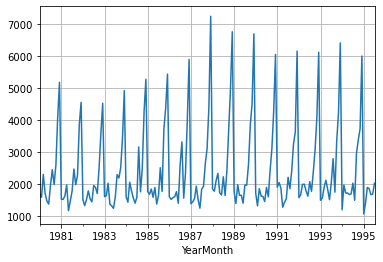

In [5]:
sparkling1.plot();
plt.grid()

In [6]:
sparkling2 = pd.read_csv("Sparkling.csv")

In [7]:
sparkling2.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


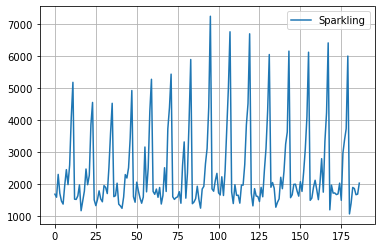

In [8]:
sparkling2.plot();
plt.grid()

In [9]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [10]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [11]:
sparkling2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
sparkling2.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


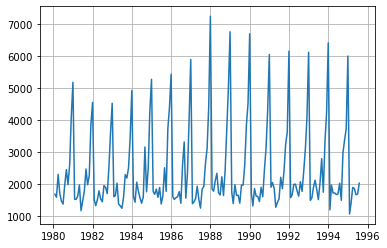

In [12]:
plt.plot(sparkling2['Time_Stamp'],sparkling2['Sparkling']);
plt.grid()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [13]:
sparkling2.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [14]:
sparkling1['1989']

YearMonth
1989-01-01    1757
1989-02-01    1394
1989-03-01    1982
1989-04-01    1650
1989-05-01    1654
1989-06-01    1406
1989-07-01    1971
1989-08-01    1968
1989-09-01    2608
1989-10-01    3845
1989-11-01    4514
1989-12-01    6694
Name: Sparkling, dtype: int64

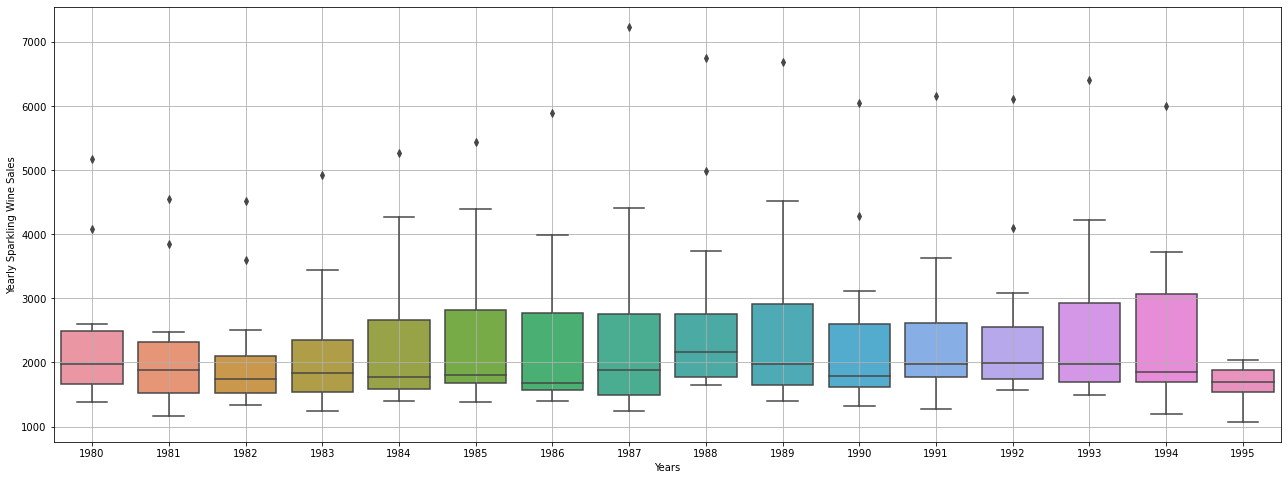

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(sparkling1.index.year, sparkling1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Wine Sales');

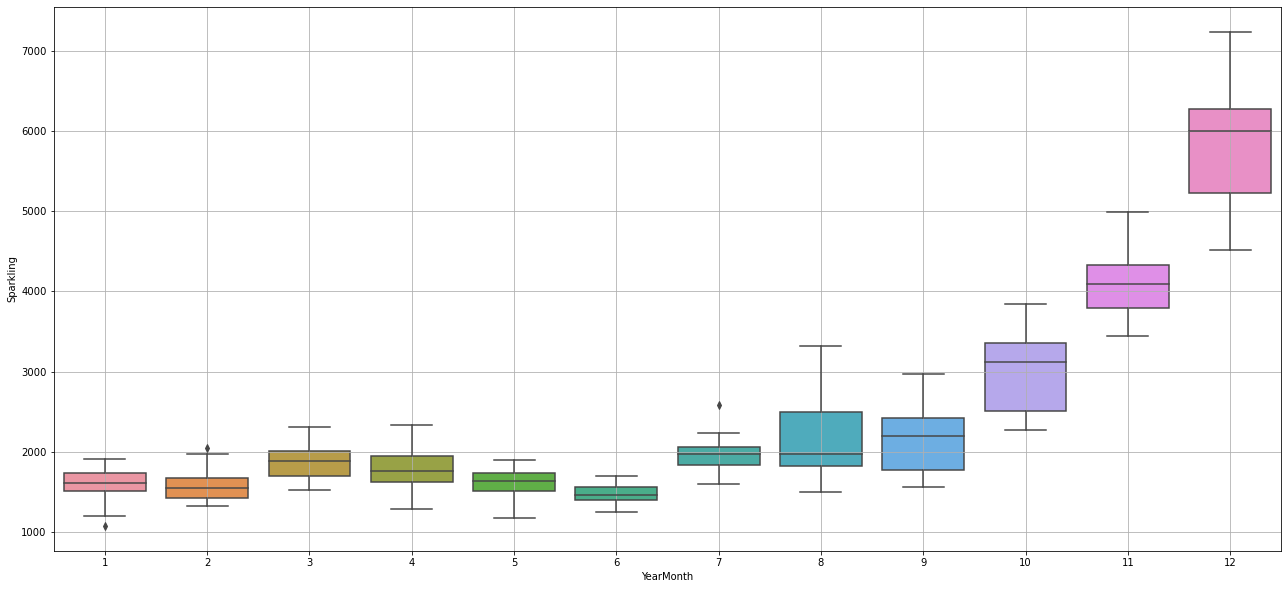

In [16]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(sparkling1.index.month, sparkling1, ax=ax,whis=1.5)
plt.grid();

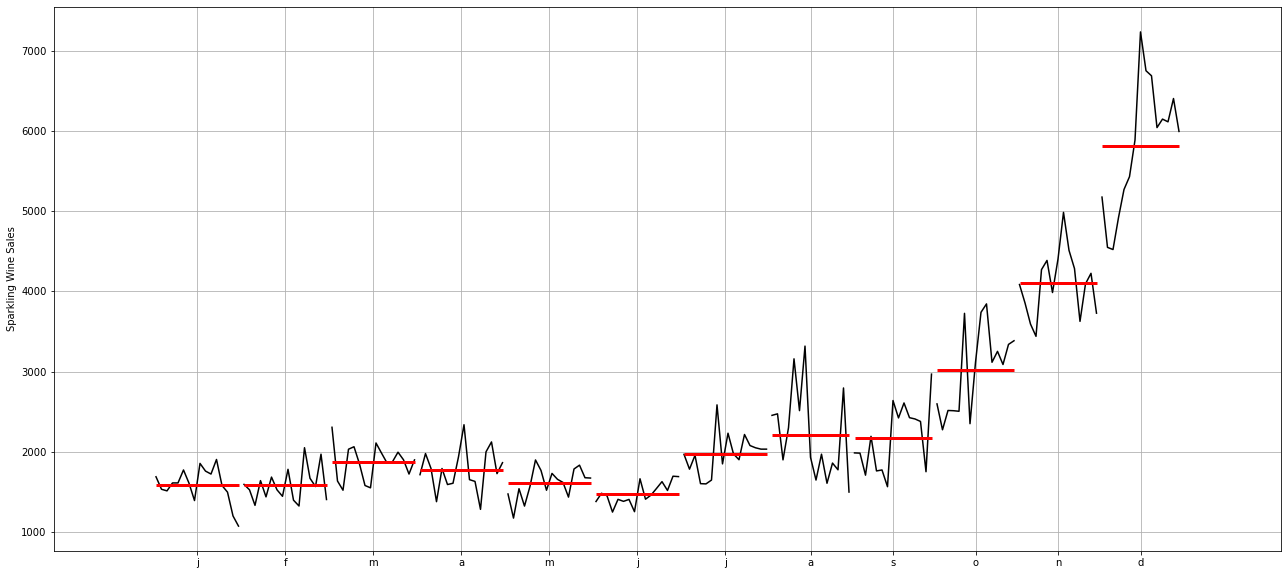

In [17]:
fig, ax = plt.subplots(figsize=(22,10))

month_plot(sparkling1,ylabel='Sparkling Wine Sales',ax=ax)
plt.grid();

In [18]:
sparkling2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
sparkling2.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [19]:
sparkling2.drop(labels='YearMonth',inplace=True,axis=1)
sparkling2.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [20]:
sparkling2['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1995-03-31    1897
1995-04-30    1862
1995-05-31    1670
1995-06-30    1688
1995-07-31    2031
Name: Sparkling, Length: 187, dtype: int64

In [21]:
yearly_sales_across_months = pd.pivot_table(sparkling2, values = 'Sparkling', columns = sparkling2.index.month, 
                                        index = sparkling2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


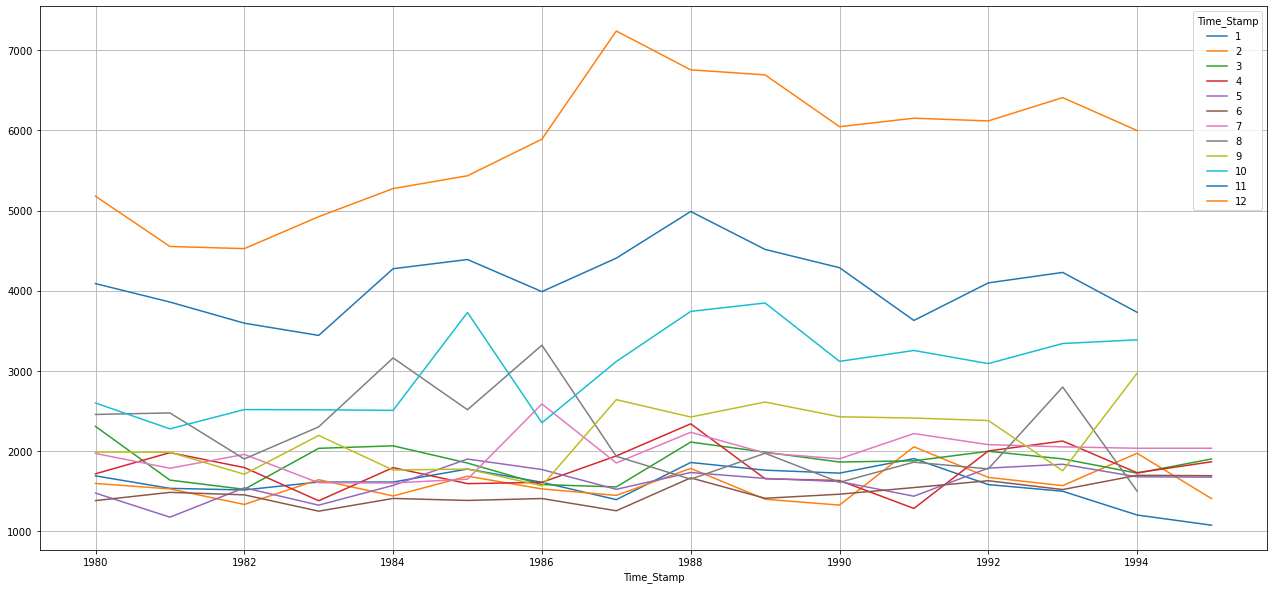

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [23]:
sparkling_yearly_sum = sparkling1.resample('A').sum()
sparkling_yearly_sum.head()

YearMonth
1980-12-31    28406
1981-12-31    26227
1982-12-31    25321
1983-12-31    26180
1984-12-31    28431
Freq: A-DEC, Name: Sparkling, dtype: int64

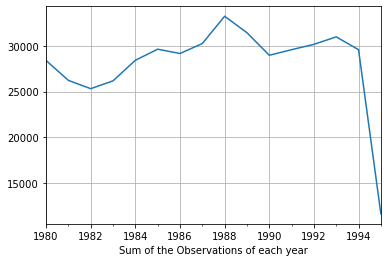

In [24]:
sparkling_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [25]:
sparkling_yearly_mean = sparkling1.resample('Y').mean()
sparkling_yearly_mean.head()

YearMonth
1980-12-31    2367.166667
1981-12-31    2185.583333
1982-12-31    2110.083333
1983-12-31    2181.666667
1984-12-31    2369.250000
Freq: A-DEC, Name: Sparkling, dtype: float64

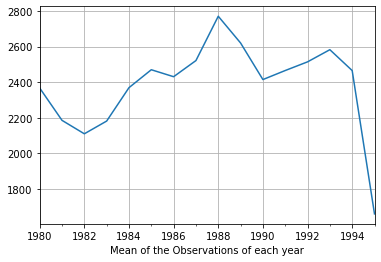

In [26]:
sparkling_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [27]:
sparkling_quarterly_sum = sparkling1.resample('Q').sum()
sparkling_quarterly_sum.head()

YearMonth
1980-03-31     5581
1980-06-30     4560
1980-09-30     6403
1980-12-31    11862
1981-03-31     4686
Freq: Q-DEC, Name: Sparkling, dtype: int64

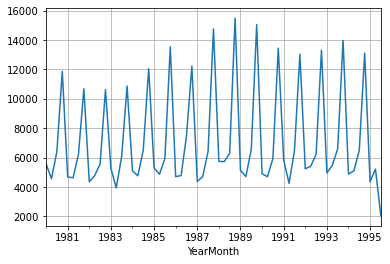

In [28]:
sparkling_quarterly_sum.plot();
plt.grid()

In [29]:
sparkling_quarterly_mean = sparkling1.resample('Q').mean()
sparkling_quarterly_mean.head()

YearMonth
1980-03-31    1860.333333
1980-06-30    1520.000000
1980-09-30    2134.333333
1980-12-31    3954.000000
1981-03-31    1562.000000
Freq: Q-DEC, Name: Sparkling, dtype: float64

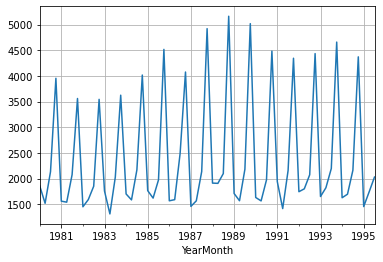

In [30]:
sparkling_quarterly_mean.plot();
plt.grid()

In [31]:
sparkling_daily_sum = sparkling1.resample('D').sum()
sparkling_daily_sum

YearMonth
1980-01-01    1686
1980-01-02       0
1980-01-03       0
1980-01-04       0
1980-01-05       0
              ... 
1995-06-27       0
1995-06-28       0
1995-06-29       0
1995-06-30       0
1995-07-01    2031
Freq: D, Name: Sparkling, Length: 5661, dtype: int64

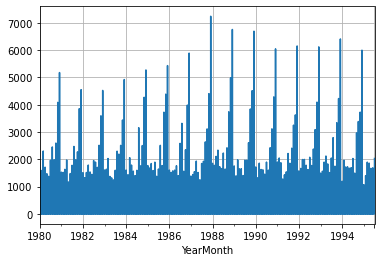

In [32]:
sparkling_daily_sum.plot()
plt.grid();

In [33]:
sparkling_decade_sum = sparkling1.resample('10Y').sum()
sparkling_decade_sum

YearMonth
1980-12-31     28406
1990-12-31    288893
2000-12-31    131953
Freq: 10A-DEC, Name: Sparkling, dtype: int64

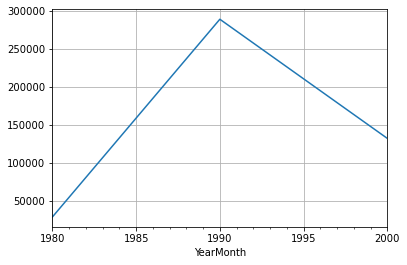

In [34]:
sparkling_decade_sum.plot();
plt.grid()

In [35]:
sparkling2.isnull().sum()

Sparkling    0
dtype: int64

#### Additive Model Decomposition

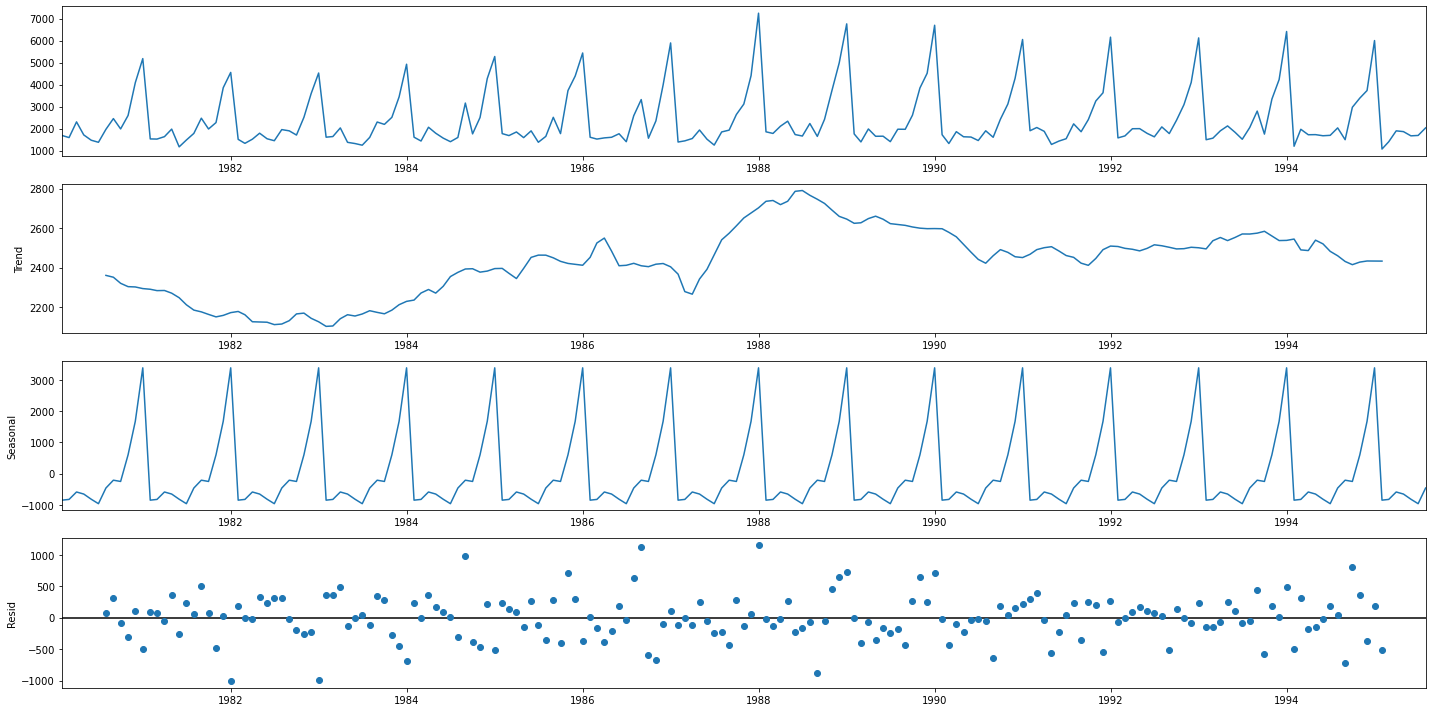

In [36]:
rcParams['figure.figsize'] = 20,10
decomposition = seasonal_decompose(sparkling2,model='additive')
decomposition.plot();

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [38]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [39]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

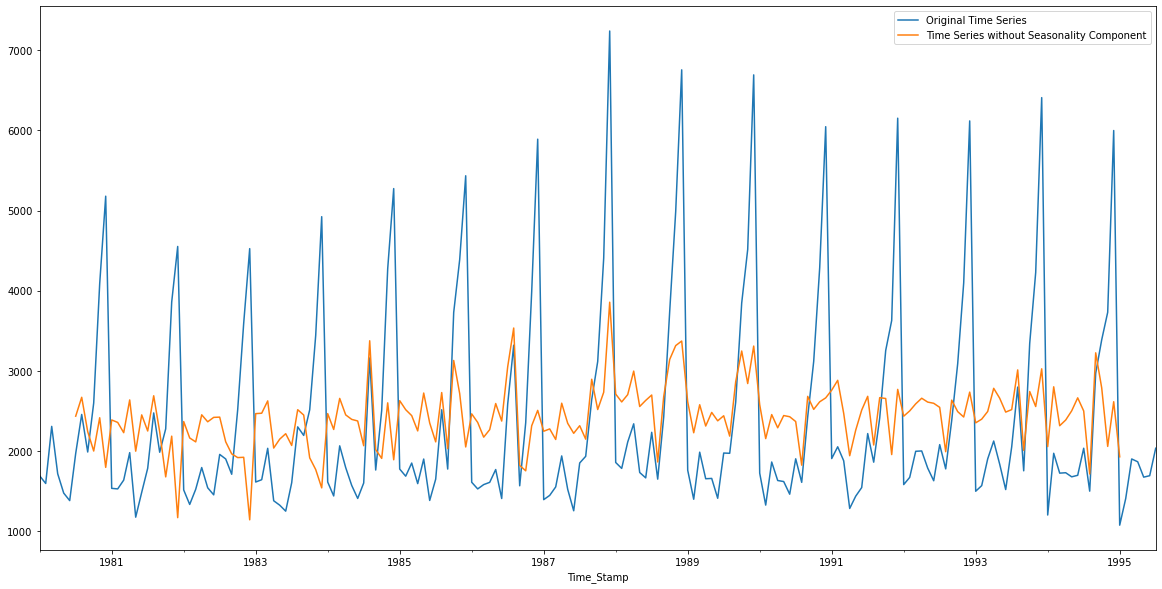

In [40]:
sparkling2.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### 3. Split the data into training and test. The test data should start in 1991.

In [41]:
train=sparkling2[sparkling2.index.year < 1991]
test=sparkling2[sparkling2.index.year >= 1991]

In [42]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [43]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



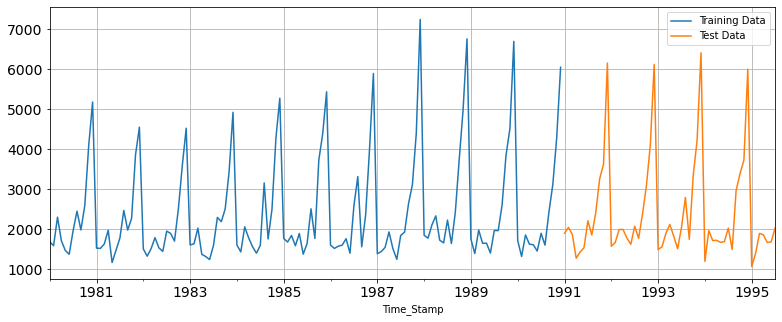

In [44]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Linear Regression Model

In [45]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [46]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [47]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [48]:
lr = LinearRegression()

In [49]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

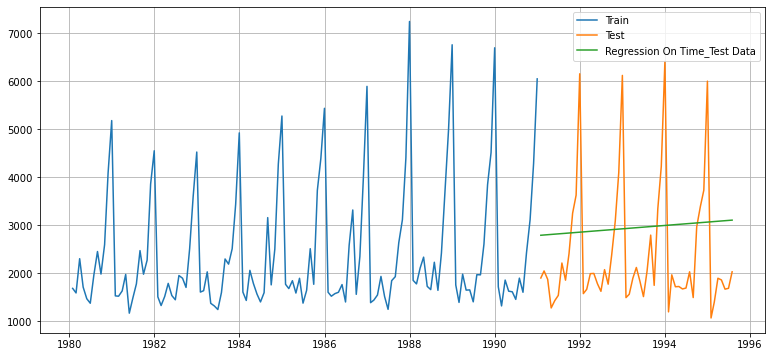

In [50]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [51]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [52]:
results = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
results

,Test RMSE
RegressionOnTime,1389.135175


#### Naive Model

In [53]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [54]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

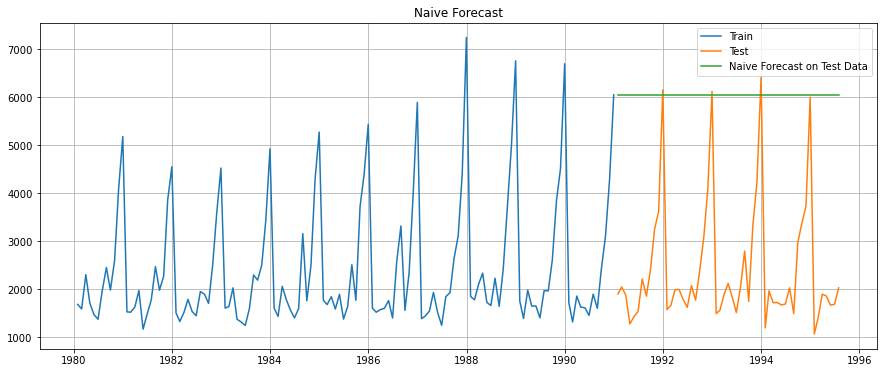

In [55]:
plt.figure(figsize=(15,6))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [56]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [57]:
resultsDF2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

results = pd.concat([results, resultsDF2])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


#### Simple Average Model

In [58]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [59]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


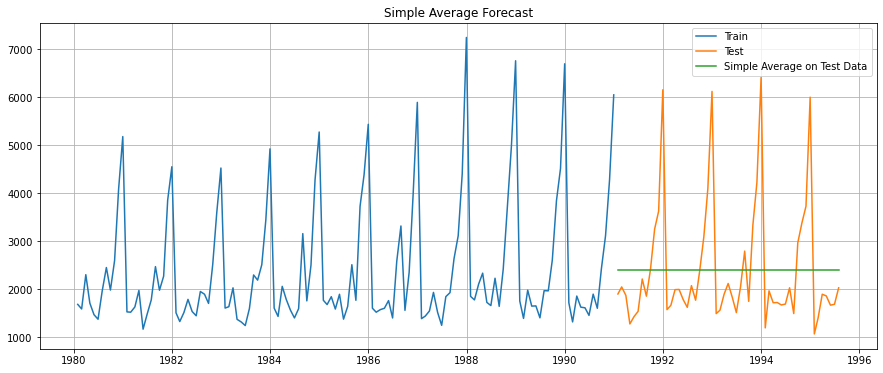

In [60]:
plt.figure(figsize=(15,6))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [61]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [62]:
resultsDF3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

results = pd.concat([results, resultsDF3])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


#### Moving Average Model

In [63]:
MovingAverage = sparkling2.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [64]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


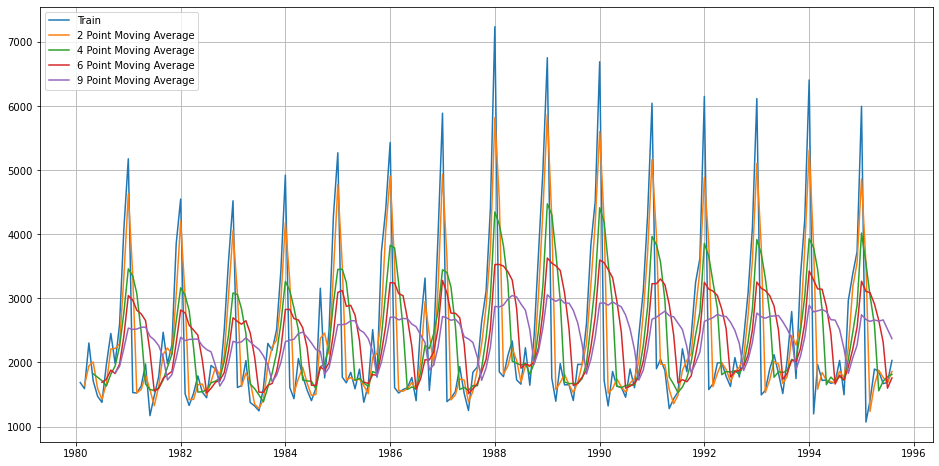

In [65]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [66]:
trailing_MovingAverage_train=MovingAverage[sparkling2.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[sparkling2.index.year >= 1991]

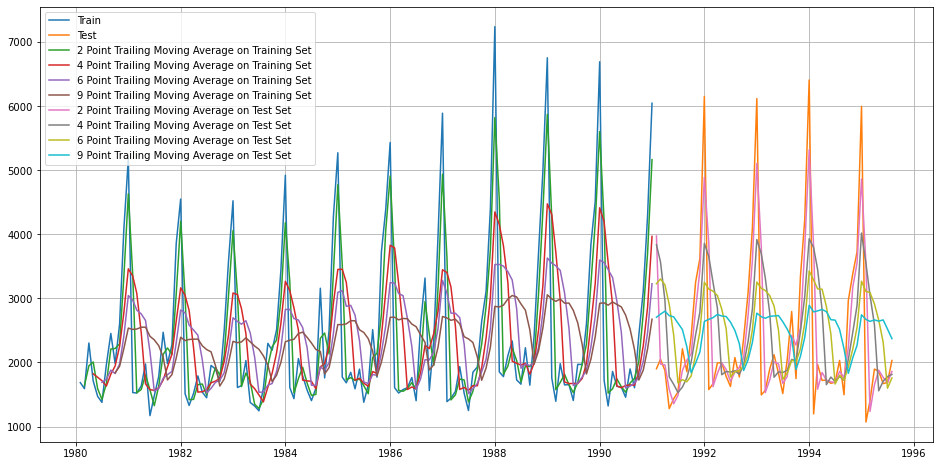

In [67]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [68]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


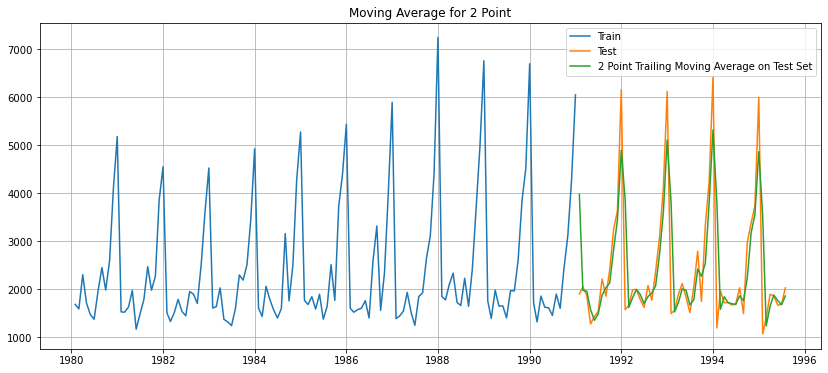

In [69]:
plt.figure(figsize=(14,6))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.title("Moving Average for 2 Point")
plt.grid();

In [70]:
resultsDF4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results = pd.concat([results, resultsDF4])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


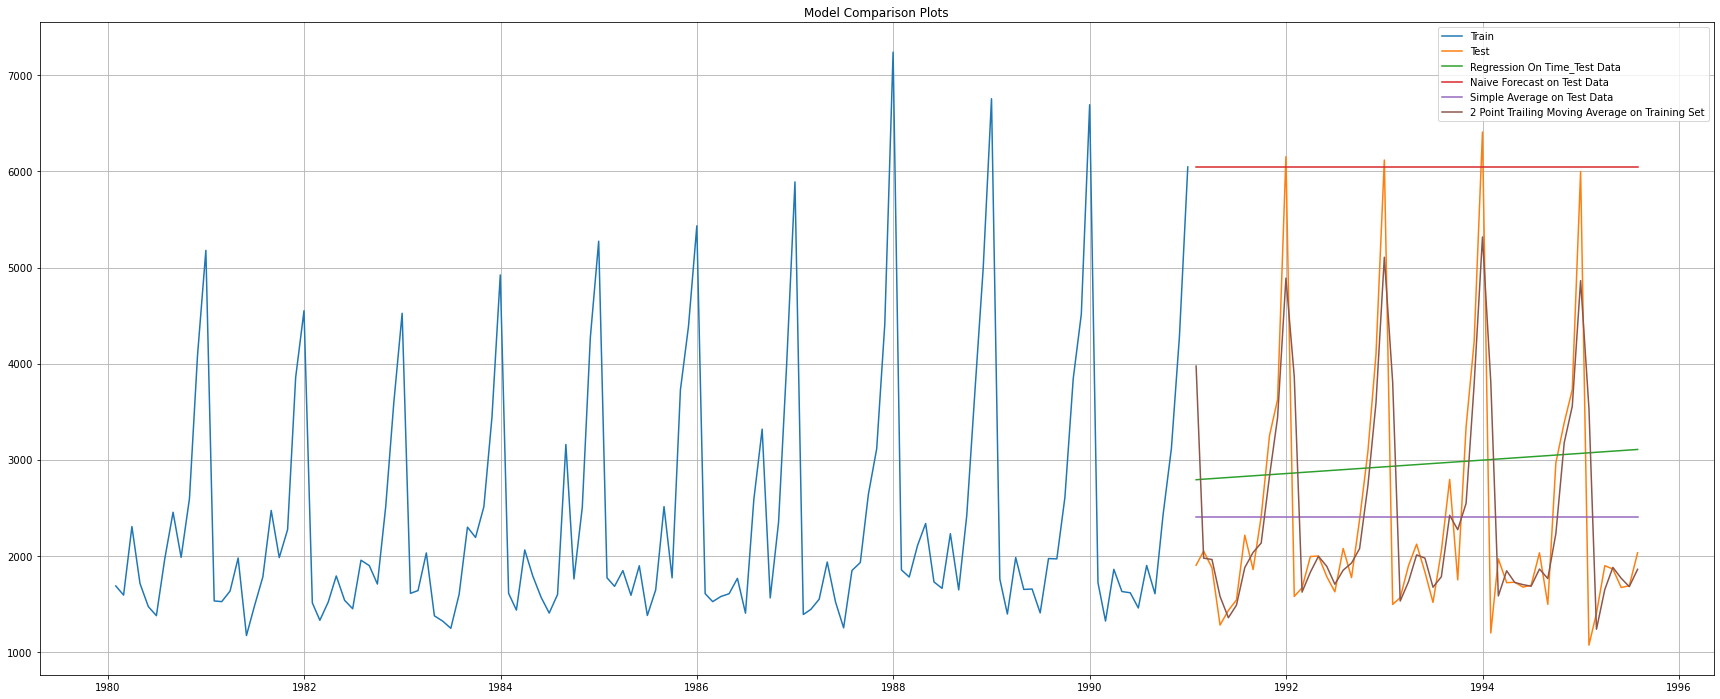

In [71]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Simple Exponential Smoothing

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.932624
1991-02-28,2049,2724.932624
1991-03-31,1874,2724.932624
1991-04-30,1279,2724.932624
1991-05-31,1432,2724.932624


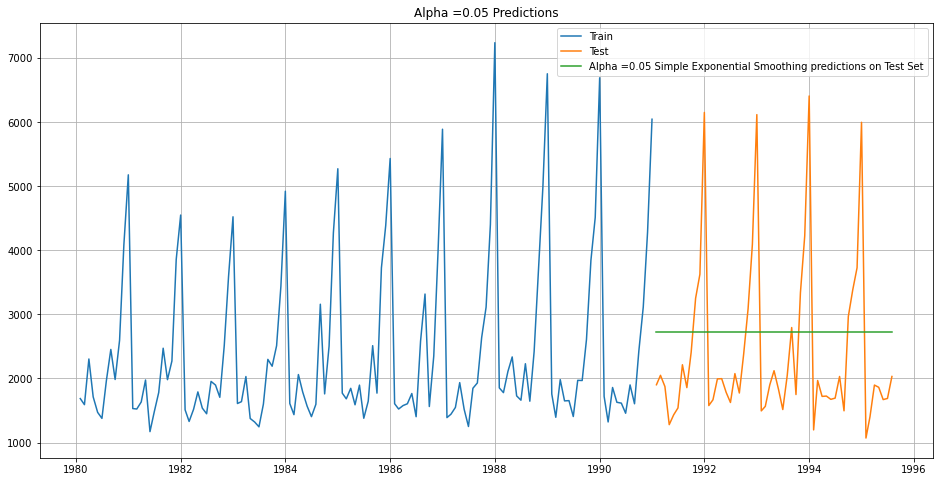

In [77]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

In [78]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [79]:
resultsDF5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])

results = pd.concat([results, resultsDF5])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487


#### Double Exponential Smoothing

In [80]:
DES_train = train.copy()
DES_test = test.copy()

In [81]:
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [82]:
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict'].head()

Time_Stamp
1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
Name: predict, dtype: float64

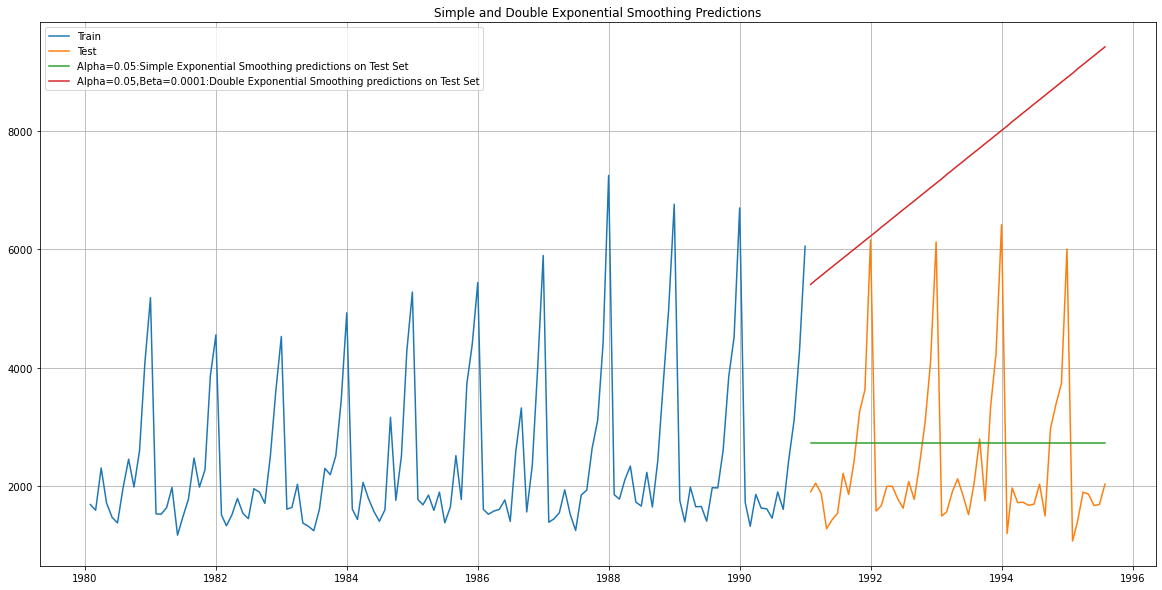

In [83]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.05:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha=0.05,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [84]:
rmse_model6_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha =0.05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 5291.880


In [85]:
resultsDF6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.05,DoubleExponentialSmoothing'])

results = pd.concat([results, resultsDF6])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833


#### Triple Exponential Smoothing

In [86]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [88]:
model_TES_autofit = model_TES.fit()

In [89]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1577.224489
1991-02-28,2049,1333.677558
1991-03-31,1874,1745.945679
1991-04-30,1279,1630.411925
1991-05-31,1432,1523.289070


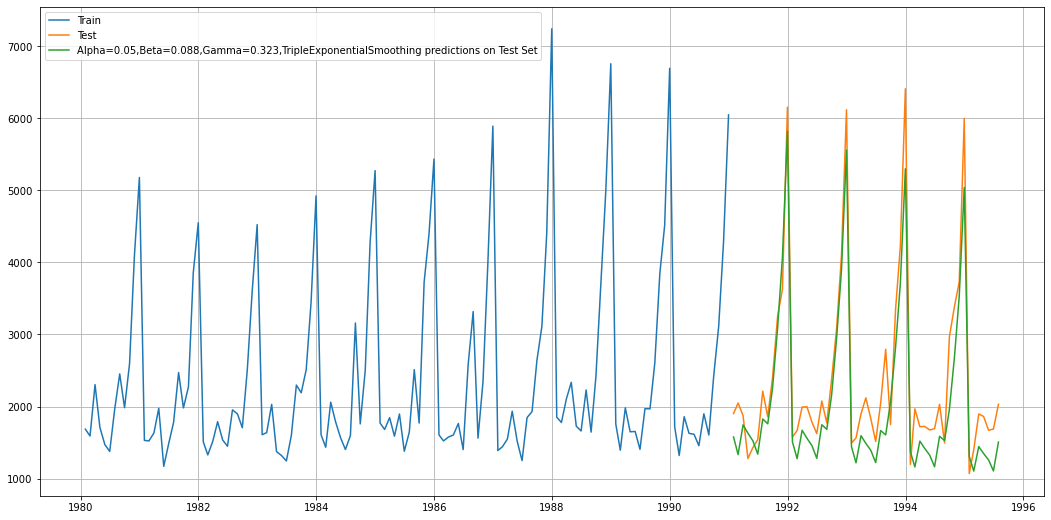

In [91]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [92]:
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.05,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.05,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768


In [93]:
resultsDF7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDF7])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


In [94]:
resultsDF7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDF7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [95]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test['Sparkling']))
        
            rmse_model7_1_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model7_1_1_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDF7 = resultsDF7.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_1_train,'Test RMSE':rmse_model7_1_1_test}
                                                 , ignore_index=True)

In [96]:
resultsDF7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,3.927862e+02
1,0.3,0.3,0.4,402.088628,9.513202e+02
2,0.3,0.3,0.5,408.282432,1.470487e+03
3,0.3,0.3,0.6,428.631668,2.181724e+03
4,0.3,0.3,0.7,468.958530,3.513351e+03
...,...,...,...,...,...
507,1.0,1.0,0.6,153394.791826,7.989790e+05
508,1.0,1.0,0.7,94040.964958,1.074413e+06
509,1.0,1.0,0.8,102196.953755,5.010607e+06
510,1.0,1.0,0.9,77924.294413,4.318265e+05


In [97]:
resultsDF7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,392.786198
8,0.3,0.4,0.3,424.828055,410.854547
65,0.4,0.3,0.4,435.553595,421.409170
296,0.7,0.8,0.3,700.317756,518.188752
130,0.5,0.3,0.5,498.239915,542.175497


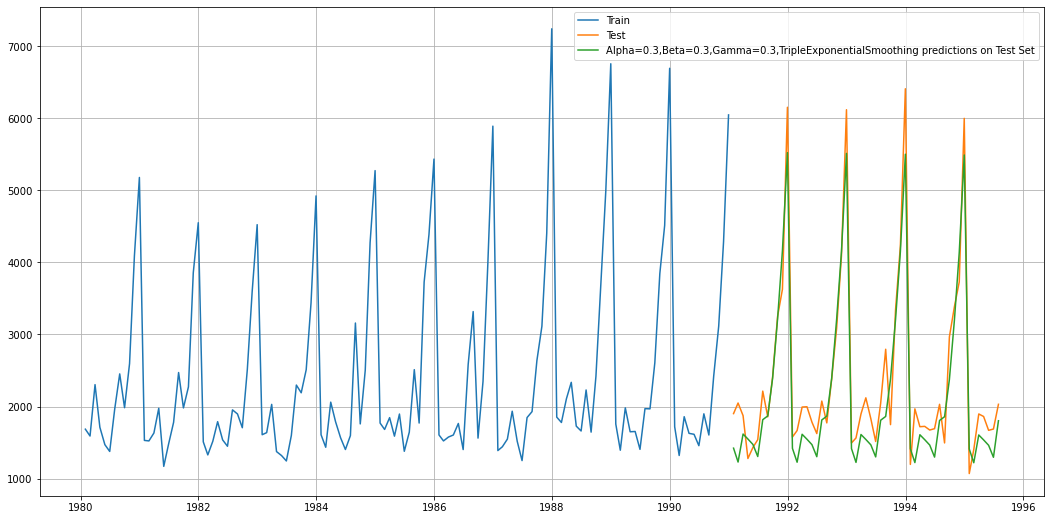

In [98]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

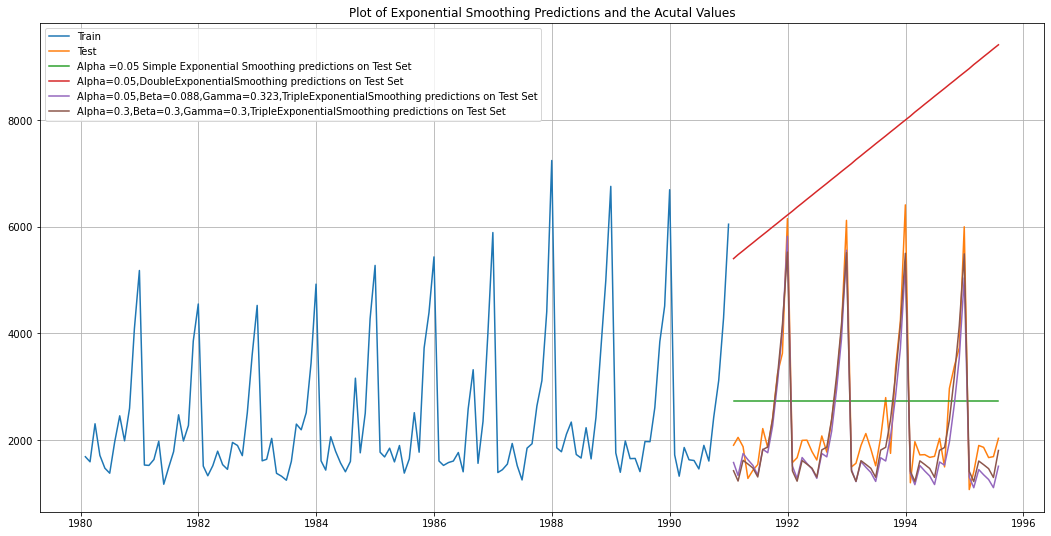

In [99]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.05,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [100]:
rmse_model7_test_1_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict', 0.3, 0.3, 0.3],squared=False)
rmse_model7_test_1_1

392.786197895143

In [101]:
resultsDF7 = pd.DataFrame({'Test RMSE': rmse_model7_test_1_1}
                           ,index=['Alpha=0.03,Beta=0.03,Gamma=0.3,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDF7])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [102]:
dftest = adfuller(sparkling2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


In [103]:
dftest = adfuller(sparkling2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


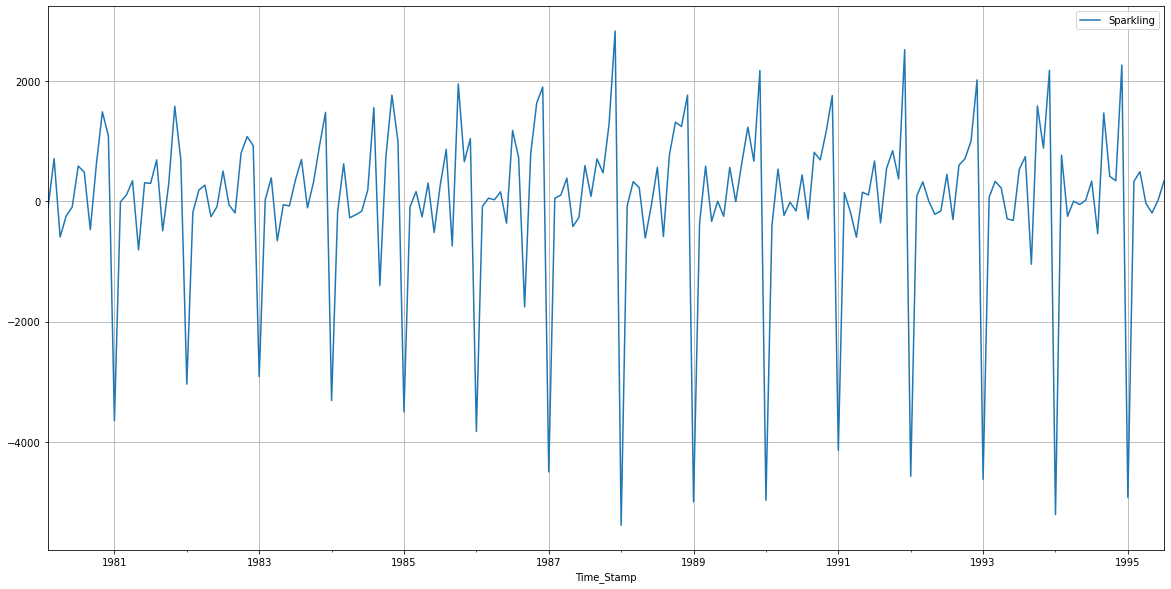

In [104]:
sparkling2.diff().dropna().plot(grid=True);

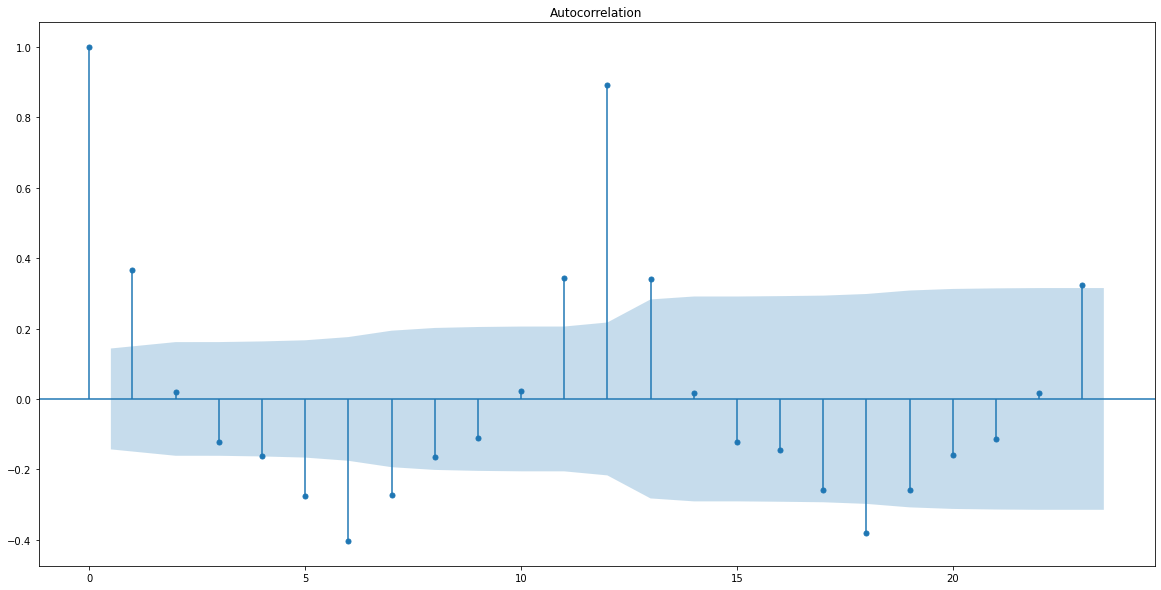

In [105]:
plot_acf(sparkling2,alpha=0.05);

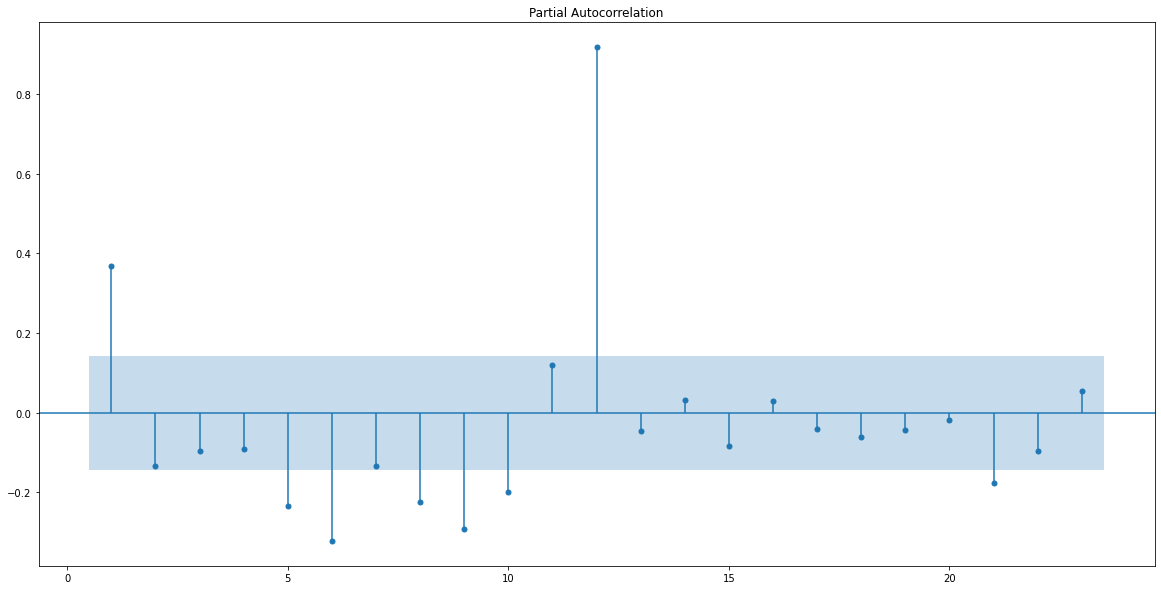

In [106]:
plot_pacf(sparkling2,zero=False,alpha=0.05);

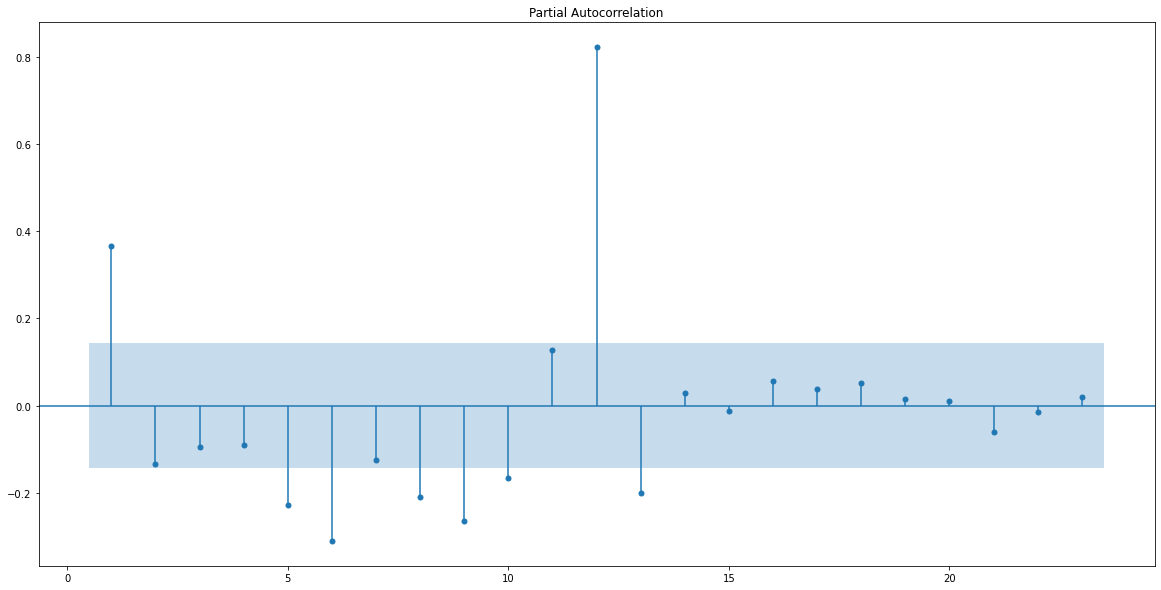

In [107]:
plot_pacf(sparkling2,zero=False,alpha=0.05,method='ywmle');

In [108]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


In [109]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


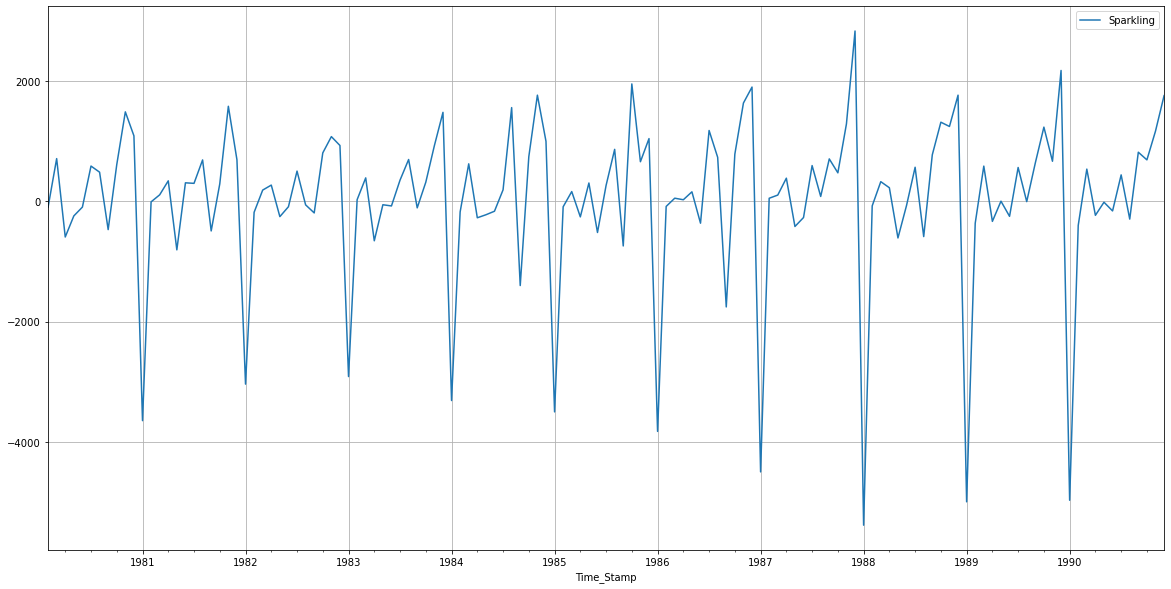

In [110]:
train.diff().dropna().plot(grid=True);

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### and

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [112]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [113]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [114]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566
ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065
ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803


In [115]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.458954
14,"(3, 1, 2)",2230.952333
11,"(2, 1, 3)",2232.937076
9,"(2, 1, 1)",2233.777626


In [116]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 09 Oct 2022   AIC                           2213.509
Time:                        15:12:23   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

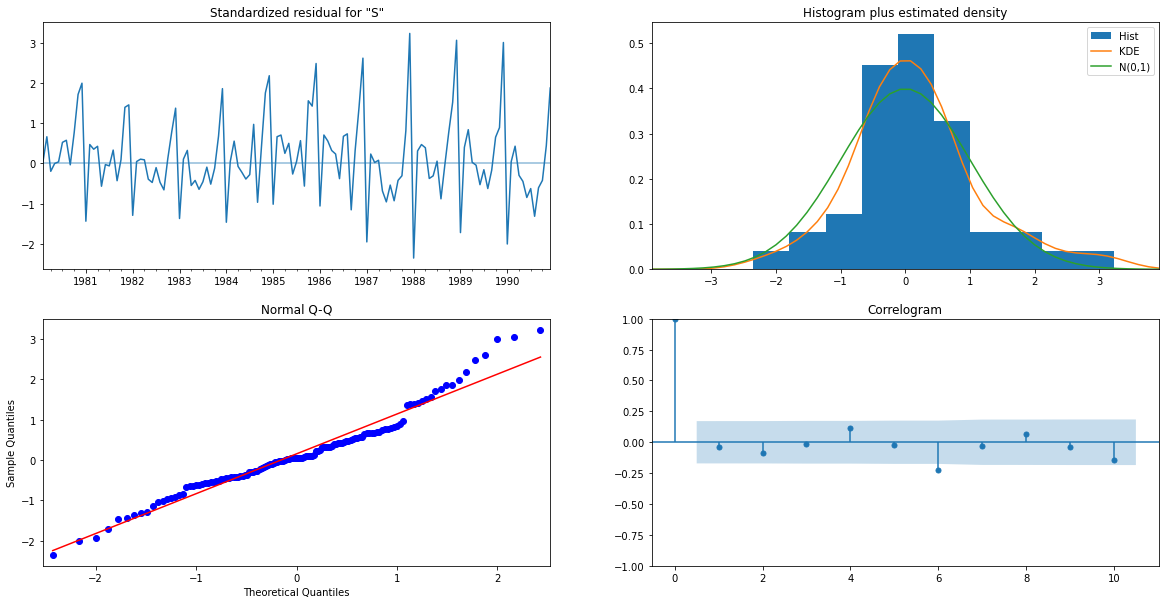

In [117]:
results_auto_ARIMA.plot_diagnostics();

In [118]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [119]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [120]:
rmse_model8 = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
rmse_model8

1299.9796397916396

In [121]:
resultsDF8 = pd.DataFrame({'Test RMSE': [rmse_model8]}
                           ,index=['ARIMA(2,1,2)'])

results = pd.concat([results, resultsDF8])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


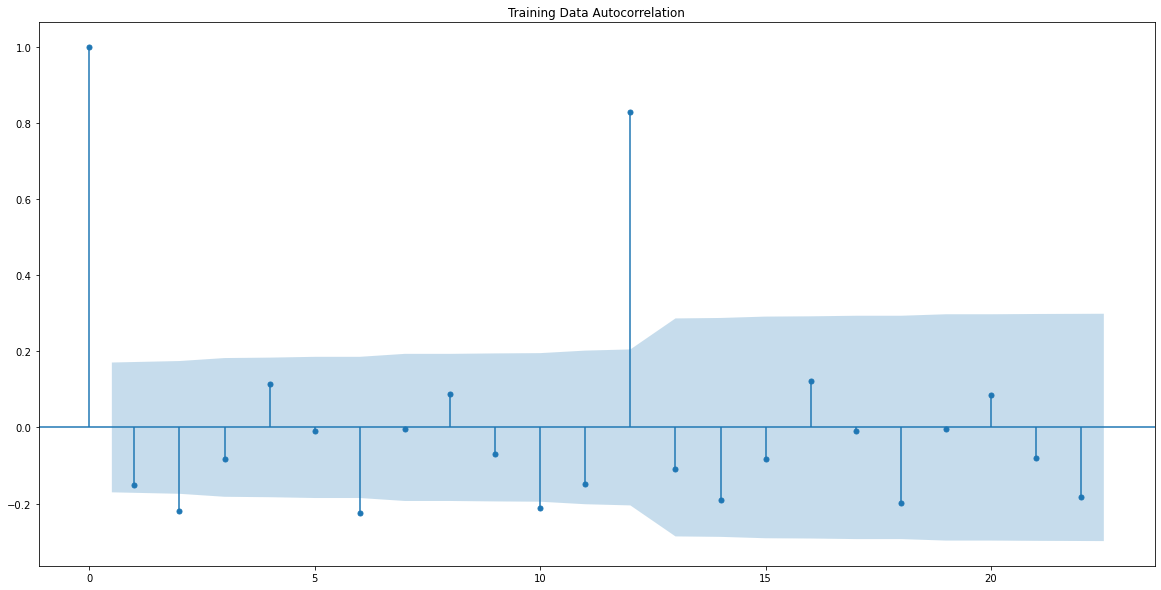

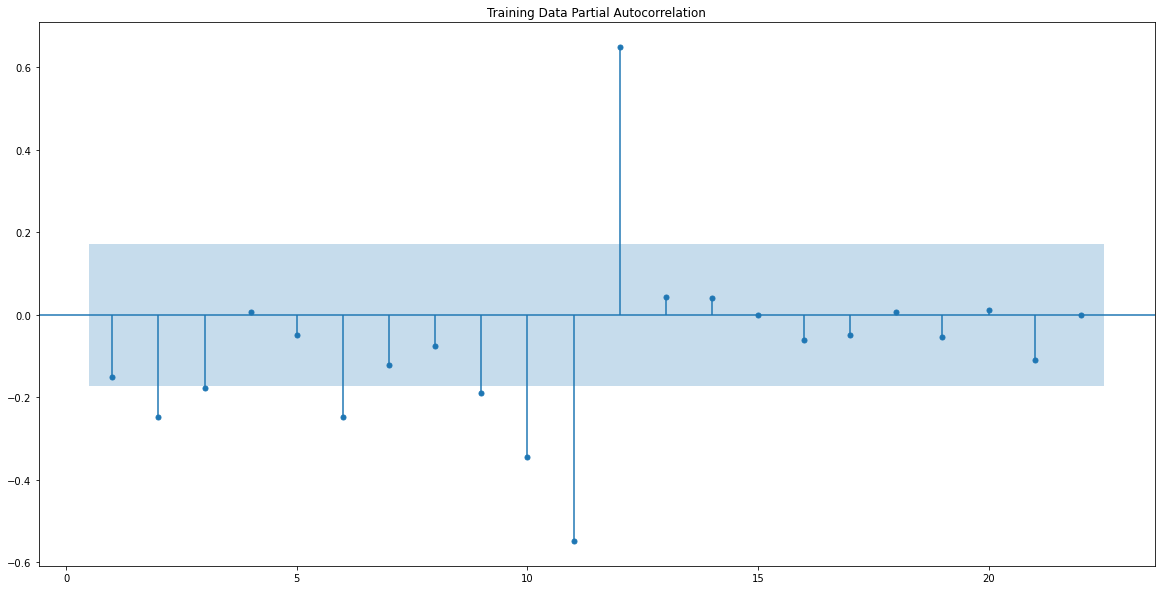

In [122]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [123]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(1,1,4),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -1107.868
Date:                Sun, 09 Oct 2022   AIC                           2227.737
Time:                        15:12:25   BIC                           2244.988
Sample:                    01-31-1980   HQIC                          2234.747
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9959      0.009   -116.351      0.000      -1.013      -0.979
ma.L1          0.6628      0.162      4.103      0.000       0.346       0.979
ma.L2         -1.1650      0.242     -4.813      0.0

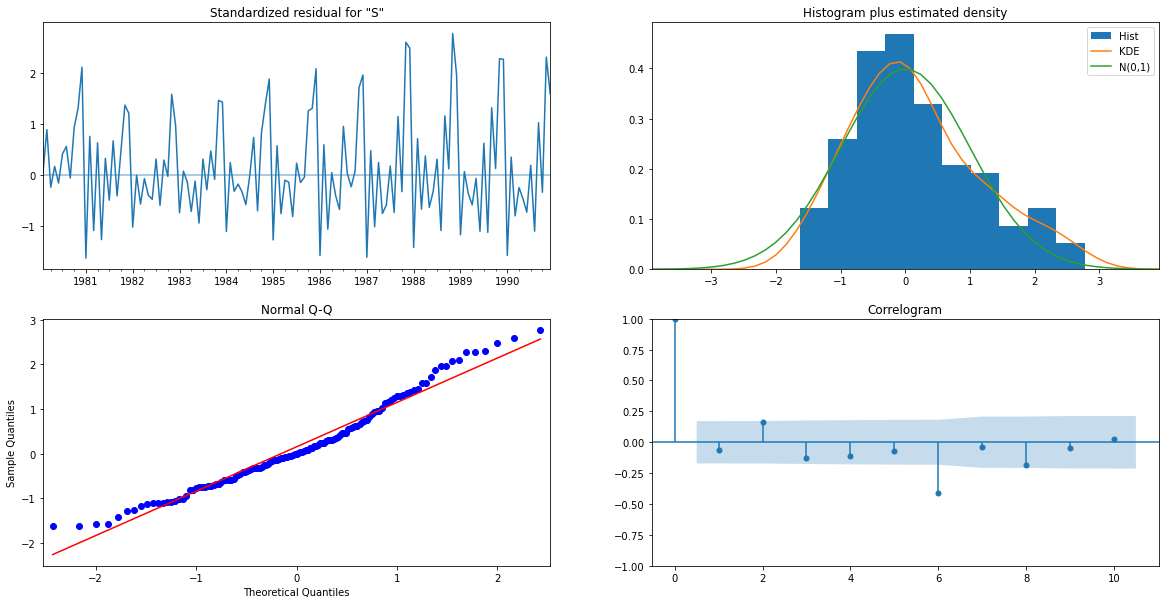

In [124]:
results_manual_ARIMA.plot_diagnostics();

In [125]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [126]:
rmse_model9 = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
rmse_model9

1263.4712891411202

In [127]:
resultsDF9 = pd.DataFrame({'Test RMSE': [rmse_model9]}
                           ,index=['Manual ARIMA(1,1,4)'])

results = pd.concat([results, resultsDF9])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


#### SARIMA Model

In [128]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [129]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [130]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536892695
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973322
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430967
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123151866
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094940895
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510475
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657137
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549575
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.687995381667
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858030697
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138750511078
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082834
SARIMA(0, 1, 1)x(0, 0, 2, 6) - 

In [131]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1629.05271
251,"(3, 1, 3)","(2, 0, 3, 6)",1631.005209
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.327863
63,"(0, 1, 3)","(3, 0, 3, 6)",1634.986909
123,"(1, 1, 3)","(2, 0, 3, 6)",1635.42744


In [132]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.526
Date:                           Sun, 09 Oct 2022   AIC                           1629.053
Time:                                   15:17:56   BIC                           1658.658
Sample:                               01-31-1980   HQIC                          1641.059
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7438      0.063    -27.602      0.000      -1.868      -1.620
ar.L2         -0.7862      0.068    -11.595

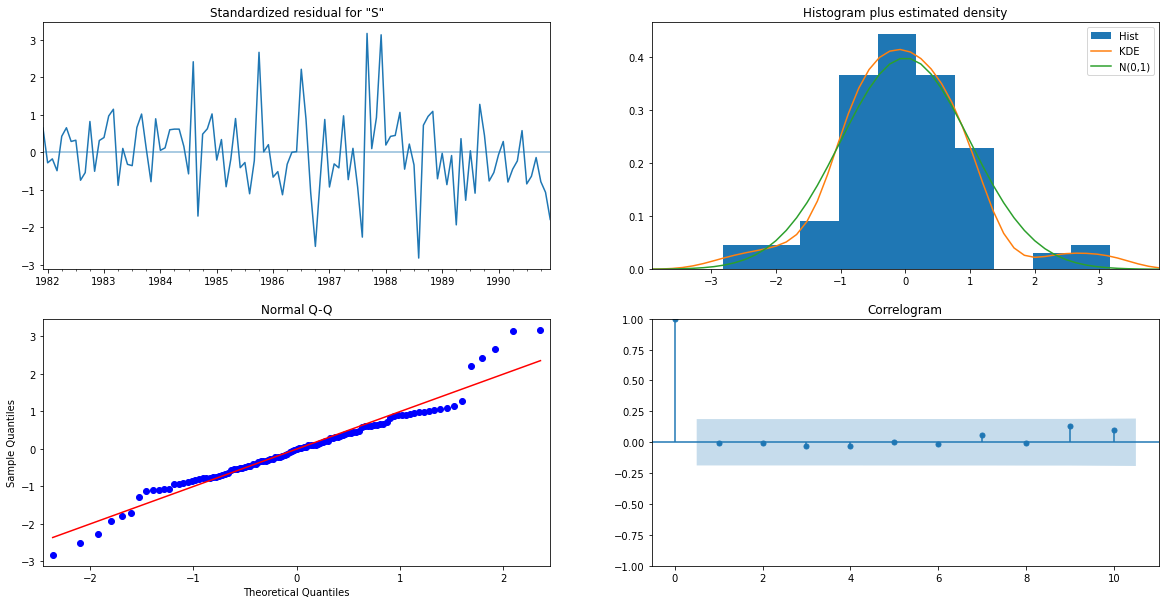

In [133]:
results_auto_SARIMA.plot_diagnostics();

In [134]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [135]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1343.485213,366.271287,625.606683,2061.363744
1991-02-28,992.795190,384.692403,238.811936,1746.778445
1991-03-31,1645.608278,384.931040,891.157304,2400.059253
1991-04-30,1569.816593,395.623697,794.408396,2345.224791
1991-05-31,1171.142185,395.790313,395.407427,1946.876943


In [136]:
rmse_model10 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
rmse_model10

824.0240155029172

In [137]:
resultsDF10 = pd.DataFrame({'Test RMSE': [rmse_model10]}
                           ,index=['SARIMA (2, 1, 3) (2, 0, 3, 6)'])

results = pd.concat([results, resultsDF10])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


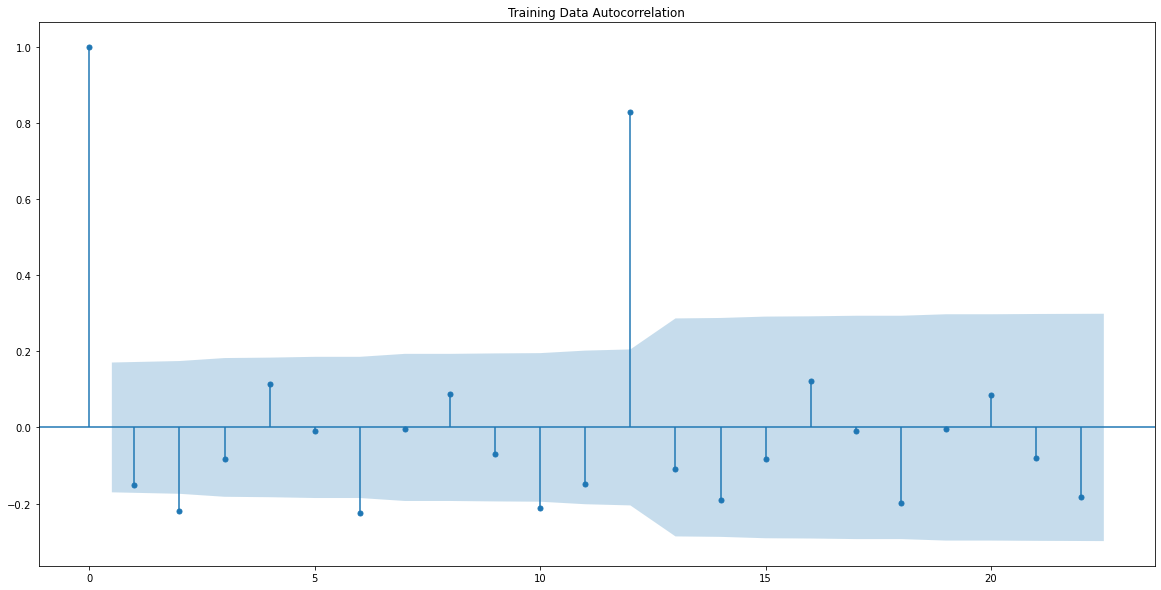

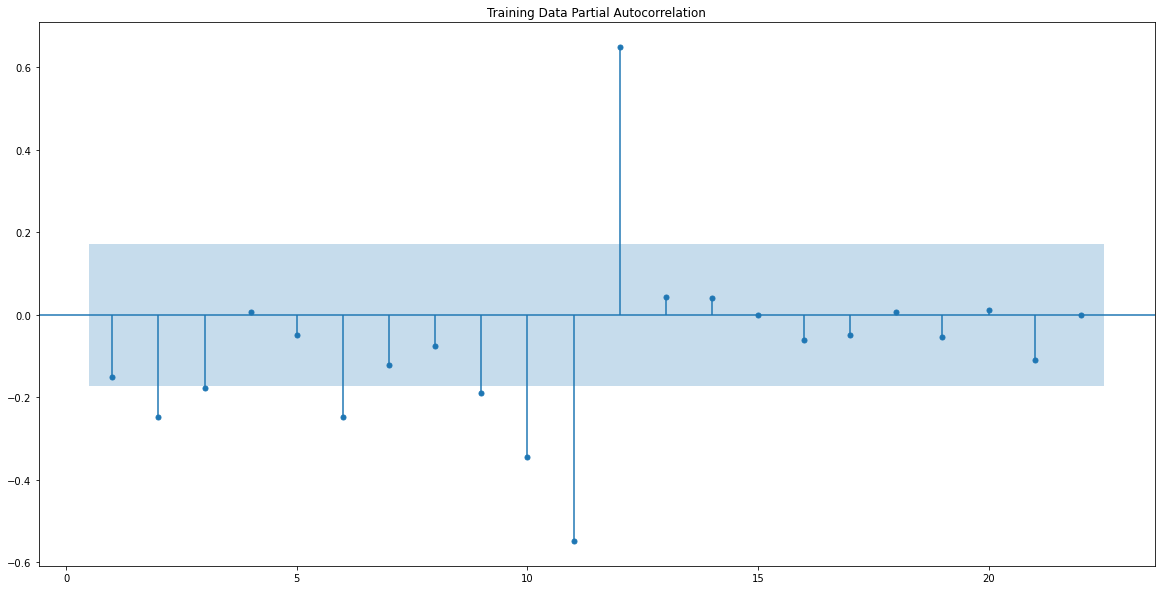

In [138]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [139]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood                -813.744
Date:                                   Sun, 09 Oct 2022   AIC                           1645.488
Time:                                           15:18:00   BIC                           1669.793
Sample:                                       01-31-1980   HQIC                          1655.346
                                            - 12-31-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7153      0.274     -2.608      0.009    

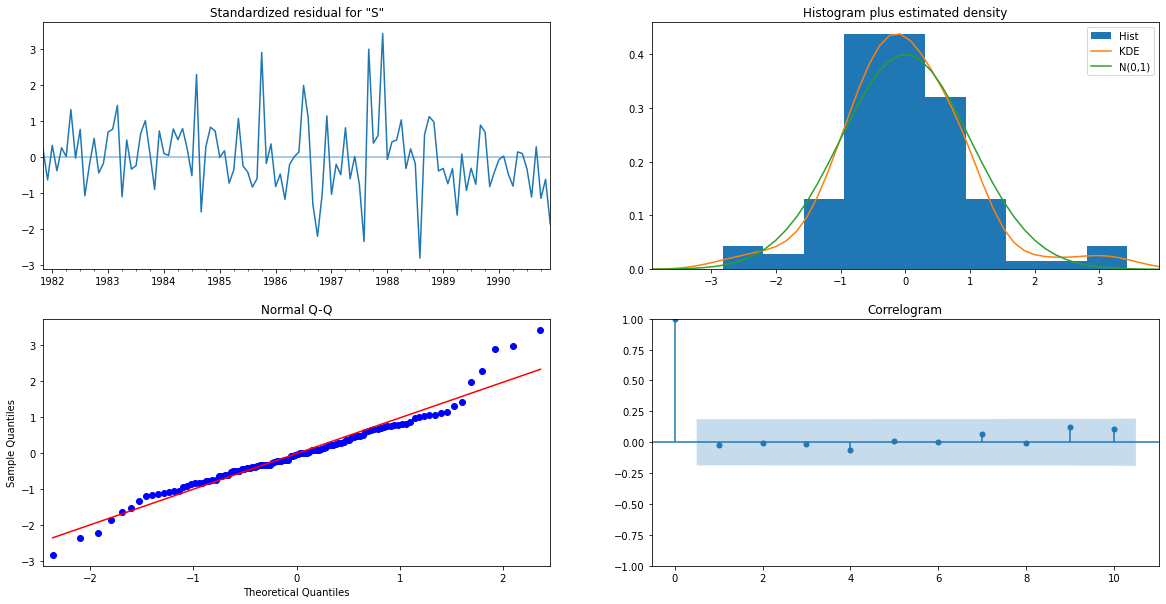

In [140]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [141]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [142]:
rmse_model11 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
rmse_model11

768.7596485905818

In [143]:
resultsDF11 = pd.DataFrame({'Test RMSE': [rmse_model11]}
                           ,index=['Manual SARIMA (1, 1, 2) (2, 0, 3, 6)'])

results = pd.concat([results, resultsDF11])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [144]:
Final_results = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime']) #Linear Regression Model
Final_results = pd.concat([Final_results, resultsDF2]) #Naive Model
Final_results = pd.concat([Final_results, resultsDF3]) #Simple Average Model
Final_results = pd.concat([Final_results, resultsDF4]) #Moving Average with rolling points as 2, 4, 6, 9
Final_results = pd.concat([Final_results, resultsDF5]) #Single Exponential Smoothing
Final_results = pd.concat([Final_results, resultsDF6]) #Double Exponential Smoothing
Final_results = pd.concat([Final_results, resultsDF7]) #Triple Exponential Smoothing
Final_results = pd.concat([Final_results, resultsDF8]) #Automated ARIMA Model
Final_results = pd.concat([Final_results, resultsDF9]) #Manual ARIMA Model
Final_results = pd.concat([Final_results, resultsDF10]) #Automated SARIMA Model
Final_results = pd.concat([Final_results, resultsDF11]) #Manual SARIMA Model
Final_results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.03,Beta=0.03,Gamma=0.3,TripleExponentialSmoothing",392.786198


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Triple Exponential Smoothing on Full Data

In [145]:
fullmodel = ExponentialSmoothing(sparkling2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

In [146]:
RMSE_fullmodel = metrics.mean_squared_error(sparkling2['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 421.47309095989743


In [147]:
prediction_1 = fullmodel.forecast(steps=12)

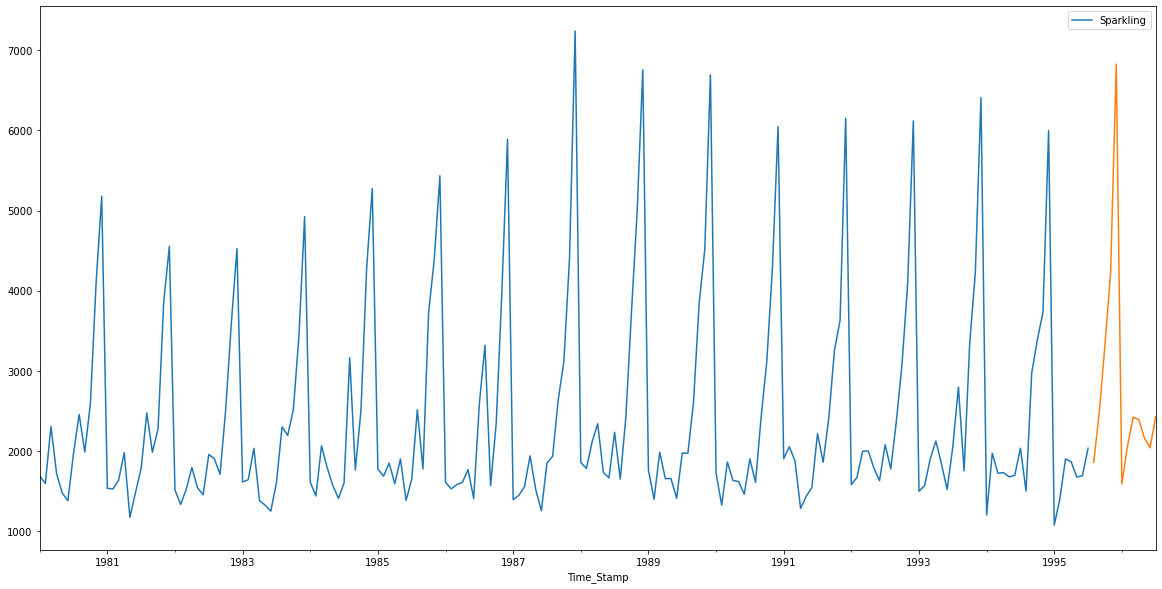

In [148]:
sparkling2.plot()
prediction_1.plot();

In [149]:
resultsDF13 = pd.DataFrame({'Test RMSE': [RMSE_fullmodel]}
                           ,index=['Full Data Triple Exponential Smoothing Alpha=0.3,Beta=0.3,Gamma=0.3'])

results = pd.concat([results, resultsDF13])
results

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.05,DoubleExponentialSmoothing",5291.879833
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",469.767970


In [150]:
prediction_1

1995-08-31    1855.493994
1995-09-30    2487.036310
1995-10-31    3323.521334
1995-11-30    4225.746256
1995-12-31    6828.934592
1996-01-31    1584.650378
1996-02-29    2060.906225
1996-03-31    2417.445422
1996-04-30    2389.901569
1996-05-31    2157.274826
1996-06-30    2036.685998
1996-07-31    2423.767253
Freq: M, dtype: float64

In [151]:
prediction_1.sum()

33791.36415776981

In [152]:
prediction_1.describe()

count      12.000000
mean     2815.947013
std      1446.038008
min      1584.650378
25%      2054.851168
50%      2403.673495
75%      2696.157566
max      6828.934592
dtype: float64

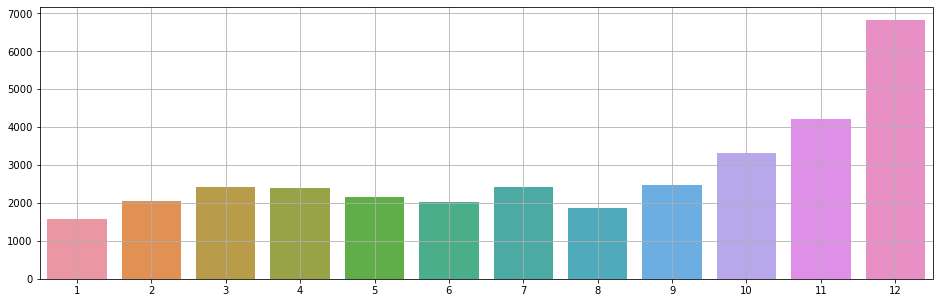

In [153]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(prediction_1.index.month, prediction_1, ax=ax)
plt.grid();

# END